In [1]:
import tensorflow as tf
import tensorflow_hub as hub 
import cv2
from matplotlib import pyplot as plt
import numpy as np


In [2]:
# For better visualization of decimals numbers:
np.set_printoptions(precision=10, suppress=True)

In [3]:
model = hub.load("https://www.kaggle.com/models/google/movenet/frameworks/TensorFlow2/variations/multipose-lightning/versions/1")
movenent = model.signatures['serving_default']

In [4]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 6, (0,255,0), -1)

In [5]:
# Define connections between our point 
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [6]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 4)

In [7]:
# loop through each person detected and render 
def loop_through_people(frame, keypoints_with_scores, edges, confidence_threshold):
    for person in keypoints_with_scores:
        draw_connections(frame, person, edges, confidence_threshold)
        draw_keypoints(frame, person, confidence_threshold)

In [9]:
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
    
    # Resize image
    img = frame.copy()
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 192,256)
    input_img = tf.cast(img,dtype=tf.int32)
    
    # Detection section
    results = movenent(input_img)
    keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
    
    # Render keypoints
    loop_through_people(frame, keypoints_with_scores, EDGES, 0.3)
    
    # print("---------Frame Data---------")
    # print(keypoints_with_scores)
    
    cv2.imshow('Movenet Multipose', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [9]:
import cv2
import tensorflow as tf

# Fonction pour redimensionner la fenêtre OpenCV en fonction de la taille de l'écran
def resize_window(window_name):
=cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
    cv2.setWindowProperty(window_name, cv2.WND_PROP_AUTOSIZE, cv2.WINDOW_AUTOSIZE)

# Initialiser la capture vidéo
cap = cv2.VideoCapture(0)

# Créer une fenêtre OpenCV
resize_window('Movenet Multipose')

while cap.isOpened(): 
    ret, frame = cap.read()
    
    # Resize image sans étirement
    img = frame.copy()
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 192, 256, method=tf.image.ResizeMethod.AREA)
    input_img = tf.cast(img, dtype=tf.int32)
    
    # Detection section (Assuming `movenent` and `loop_through_people` functions are defined elsewhere)
    results = movenent(input_img)
    keypoints_with_scores = results['output_0'].numpy()[:, :, :51].reshape((6, 17, 3))
    
    # Render keypoints
    loop_through_people(frame, keypoints_with_scores, EDGES, 0.3)
    
    cv2.imshow('Movenet Multipose', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()


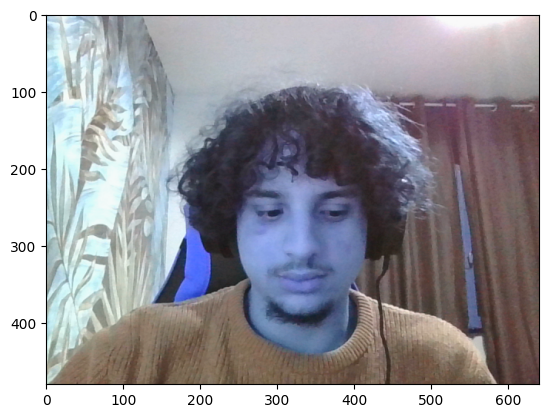

In [12]:
plt.imshow(frame)

In [16]:
frame.shapeq

(480, 640, 3)

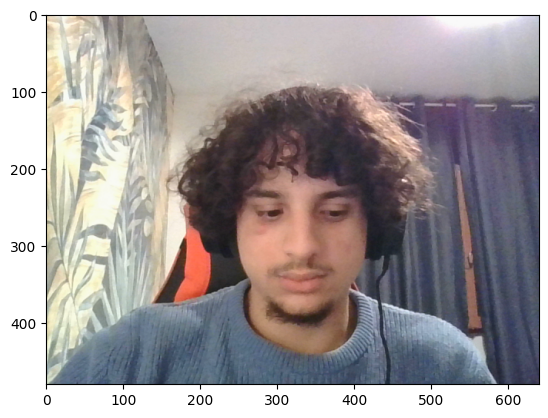

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

### Résultats du premier modèle stockés dans la varaiable "results" 
### On a 17 points soit 51 coordonnées représentant nos keypoints (y, x et le score de prédiction), les 5 dernieres valeurs présentes dans la variable "results" représentent les "bounding box coordinates" -> #TODO : voir cque sont ces 5 points j'ai pas trop compris pour l'instant

In [27]:
# on récupere juste les 51 premières
keypoints = results["output_0"].numpy()[:,:,:51]
print(keypoints.shape)
keypoints.reshape((6,17,3))

(1, 6, 51)


array([[[5.96951306e-01, 5.21382928e-01, 6.31426334e-01],
        [5.18866718e-01, 5.81366420e-01, 6.04591131e-01],
        [5.17056942e-01, 4.42614257e-01, 7.14177430e-01],
        [5.27623892e-01, 6.40980780e-01, 4.03949887e-01],
        [5.51944852e-01, 3.54982287e-01, 5.49672008e-01],
        [7.89036870e-01, 8.20485055e-01, 4.73508716e-01],
        [7.96541035e-01, 2.04108000e-01, 4.53675658e-01],
        [8.69261861e-01, 9.42779779e-01, 4.65762168e-02],
        [8.68847787e-01, 1.08471699e-01, 2.27283407e-02],
        [8.22010636e-01, 8.09490561e-01, 6.11131378e-02],
        [7.66025722e-01, 2.97221154e-01, 2.70601753e-02],
        [8.91540766e-01, 7.07112908e-01, 1.93424872e-04],
        [8.65480721e-01, 3.72844249e-01, 2.97245744e-04],
        [8.26494873e-01, 7.95713067e-01, 7.33848708e-03],
        [8.32788825e-01, 3.90827328e-01, 6.05522702e-03],
        [3.48828435e-01, 6.78465664e-01, 5.04150148e-03],
        [3.47933173e-01, 5.56919813e-01, 8.72197561e-04]],

       [[4.7

In [33]:
# une image ressemble à ça:
keypoints_with_scores[0]

array([[0.60773027  , 0.5628904   , 0.53111976  ],
       [0.53223747  , 0.6216843   , 0.5842926   ],
       [0.52652264  , 0.4856843   , 0.7195972   ],
       [0.56295574  , 0.6885955   , 0.46376303  ],
       [0.5690385   , 0.39716277  , 0.49495897  ],
       [0.83016694  , 0.84981537  , 0.62038565  ],
       [0.8246932   , 0.2080476   , 0.38891512  ],
       [0.8611434   , 0.88817793  , 0.009244213 ],
       [0.8493014   , 0.11726816  , 0.0115394965],
       [0.7880283   , 0.7485608   , 0.021760676 ],
       [0.7956763   , 0.25749677  , 0.023947794 ],
       [0.8803896   , 0.6678161   , 0.0000054501],
       [0.8683056   , 0.36066523  , 0.0040355297],
       [0.78721696  , 0.8254756   , 0.032322746 ],
       [0.7933335   , 0.38067225  , 0.014734013 ],
       [0.32549116  , 0.6439387   , 0.0032732734],
       [0.33405006  , 0.5060751   , 0.0006019021]], dtype=float32)